2-bit parity target:
 [[0]
 [1]
 [1]
 [0]]
2-bit parity output:
 [[0]
 [0]
 [0]
 [0]]
3-bit parity target:
 [[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]
3-bit parity output:
 [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


TypeError: ignored

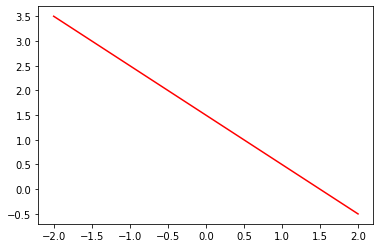

In [ ]:
# Code from Chapter 3 of Machine Learning: An Algorithmic Perspective (2nd Edition)
# by Stephen Marsland (http://stephenmonika.net)

# You are free to use, change, or redistribute the code in any way you wish for
# non-commercial purposes, but please maintain the name of the original author.
# This code comes with no warranty of any kind.

# Stephen Marsland, 2008, 2014

import numpy as np
import matplotlib.pyplot as plt

def main():
  #2-bit Parity
  inputs_2d = np.array([[0,0],[0,1],[1,0],[1,1]])
  targets_2d = np.array([[0], [1], [1], [0]])

  two_bit_parity = pcn(inputs_2d, targets_2d)
  two_bit_parity.pcntrain(inputs_2d, targets_2d, 0.25, 20)

  inputs = np.concatenate((inputs_2d,-np.ones((inputs_2d.shape[0],1))),axis=1)
  result = two_bit_parity.pcnfwd(inputs)

  print('2-bit parity target:\n', targets_2d)
  print('2-bit parity output:\n', result)

  #3-bit parity 
  inputs_3d = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
  targets_3d = np.array([[0], [1], [1], [0], [1], [0], [0], [1]])

  three_bit_parity = pcn(inputs_3d, targets_3d)
  weights = three_bit_parity.pcntrain(inputs_3d, targets_3d, 0.25, 20)
  
  inputs = np.concatenate((inputs_3d,-np.ones((inputs_3d.shape[0],1))),axis=1)
  result = three_bit_parity.pcnfwd(inputs)

  print('3-bit parity target:\n', targets_3d)
  print('3-bit parity output:\n', result)


class pcn:
	#""" A basic Perceptron"""
	
	def __init__(self,inputs,targets):
		# Set up network size
		if np.ndim(inputs)>1:
			self.nIn = np.shape(inputs)[1]
		else: 
			self.nIn = 1
	
		if np.ndim(targets)>1:
			self.nOut = np.shape(targets)[1]
		else:
			self.nOut = 1

		self.nData = np.shape(inputs)[0]
	
		# Initialise network
		self.weights = np.random.rand(self.nIn+1,self.nOut)*0.1-0.05


	def pcntrain(self,inputs,targets,eta,nIterations):
		# Add the inputs that match the bias node
		inputs = np.concatenate((inputs,-np.ones((self.nData,1))),axis=1)
		# Training
		change = range(self.nData)

		for n in range(nIterations):
			
			self.activations = self.pcnfwd(inputs);
			self.weights -= eta*np.dot(np.transpose(inputs),self.activations-targets)
		
			# Randomise order of inputs
			#np.random.shuffle(change)
			#inputs = inputs[change,:]
			#targets = targets[change,:]
			
		return self.weights

	def pcnfwd(self, inputs):
		# Compute activations
		activations =  np.dot(inputs,self.weights)

		# Threshold the activations
		return np.where(activations>0,1,0)


	def confmat(self,inputs,targets):
		#"""Confusion matrix"""

		# Add the inputs that match the bias node
		
		outputs = np.dot(self.inputs,self.weights)
	
		nClasses = np.shape(targets)[1]

		if nClasses==1:
			nClasses = 2
			outputs = np.where(outputs>0,1,0)
		else:
			# 1-of-N encoding
			outputs = np.argmax(outputs,1)
			targets = np.argmax(targets,1)

		cm = np.zeros((nClasses,nClasses))
		for i in range(nClasses):
			for j in range(nClasses):
				cm[i,j] = np.sum(np.where(outputs==i,1,0)*np.where(targets==j,1,0))

		#print cm
		#print np.trace(cm)/np.sum(cm)


if __name__ == '__main__':
  main()